In [1]:
#Import packages needed
import pandas as pd
import numpy as np
import gmaps
import requests
import re
from config import gkey
from pprint import pprint
gmaps.configure(api_key=gkey)
import matplotlib.pyplot as plt


In [2]:
# Bring in csv and look at data
nyc_jobs_csv = "Clean_and_complete_NYC_job_noComma.csv"
nyc_df = pd.read_csv(nyc_jobs_csv)
nyc_df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,New Lat,New Long,Formatted Address,Zip,Borough
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,110 William St_ New York_ NY 10038_ USA,10038,Manhattan
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,EXECUTIVE DIRECTOR_ BUSINESS DEVELOPMENT,ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,110 William St_ New York_ NY 10038_ USA,10038,Manhattan
2,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,Finance_ Accounting_ & Procurement,F,...,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-07-30T00:00:00.000,40.749357,-73.939062,42-09 28th St_ Long Island City_ NY 11101_ USA,11101,Queens
3,138531,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Chemist,ASSOCIATE CHEMIST,21822,2,Health Public Safety_ Inspections_ & Enforcement,F,...,New York City residency is generally required ...,2013-12-20T00:00:00.000,NaN,2014-07-25T00:00:00.000,2019-07-30T00:00:00.000,40.734880,-73.863489,96-05 Horace Harding Expy_ Elmhurst_ NY 11373_...,11373,Queens
4,152738,LAW DEPARTMENT,Internal,1,Office Manager,CLERICAL ASSOCIATE,10251,3,Clerical & Administrative Support,F,...,New York City residency is generally required ...,2014-06-26T00:00:00.000,NaN,2014-06-26T00:00:00.000,2019-07-30T00:00:00.000,40.713299,-74.010110,100 Church St_ New York_ NY 10007_ USA,10007,Manhattan


In [3]:
# List out all the columns
list(nyc_df)

['Job ID',
 'Agency',
 'Posting Type',
 '# Of Positions',
 'Business Title',
 'Civil Service Title',
 'Title Code No',
 'Level',
 'Job Category',
 'Full-Time/Part-Time indicator',
 'Salary Range From',
 'Salary Range To',
 'Salary Frequency',
 'Work Location',
 'Division/Work Unit',
 'Job Description',
 'Minimum Qual Requirements',
 'Preferred Skills',
 'Additional Information',
 'To Apply',
 'Hours/Shift',
 'Work Location 1',
 'Recruitment Contact',
 'Residency Requirement',
 'Posting Date',
 'Post Until',
 'Posting Updated',
 'Process Date',
 'New Lat',
 'New Long',
 'Formatted Address',
 'Zip',
 'Borough']

In [ ]:

value_counts = df['a'].value_counts(dropna=True, sort=True)
df = value_counts.rename_axis('unique_values').reset_index(name='counts')


In [41]:
FTPT_df_vc = nyc_df["Full-Time/Part-Time indicator"].value_counts()
FTPT_df = FTPT_df_vc.rename_axis('F/P').reset_index(name='counts')
FTPT_df

,F/P,counts
0,F,2576
1,P,149


In [4]:
plots_df = nyc_df.loc[:, ["Borough","Salary Range From", "Salary Range To","Salary Frequency"]]
plots_df.head()

,Borough,Salary Range From,Salary Range To,Salary Frequency
0,Manhattan,42405.0,65485.0,Annual
1,Manhattan,60740.0,162014.0,Annual
2,Queens,50598.0,85053.0,Annual
3,Queens,50623.0,75083.0,Annual
4,Manhattan,30683.0,49707.0,Annual


In [5]:
plots_df.dtypes

Borough               object
Salary Range From    float64
Salary Range To      float64
Salary Frequency      object
dtype: object

In [6]:
plots_groupby_borough = plots_df.groupby("Borough")[["Salary Range From", "Salary Range To"]].median()

In [7]:
#  df.groupby(df.date.dt.date)[['sentiment']].median()
plots_groupby_borough

,Salary Range From,Salary Range To
Borough,,
Brooklyn,62431.0,83545.5
Manhattan,57337.0,76000.0
Queens,58152.0,86238.0
Staten Island,47692.0,57161.0
The Bronx,59023.0,67876.0


In [8]:
# plots_groupby_borough["Salary Range From"] = plots_groupby_borough["Salary Range From"].map("${:,.2f}".format)
# plots_groupby_borough["Salary Range To"] = plots_groupby_borough["Salary Range To"].map("${:,.2f}".format)

In [9]:
plots_groupby_borough

,Salary Range From,Salary Range To
Borough,,
Brooklyn,62431.0,83545.5
Manhattan,57337.0,76000.0
Queens,58152.0,86238.0
Staten Island,47692.0,57161.0
The Bronx,59023.0,67876.0


In [10]:
# data1 = plots_groupby_borough["Salary Range From"]
# data2 = plots_groupby_borough["Salary Range To"]

# width = 0.3
# height = 3
# plt.bar(np.arange(len(data1)), width = width, height = height)
# plt.bar(np.arange(len(data2)), width = width, height = height)

# plt.ylabel("Median Salary")
# plt.title("Median Salary for Job Openings by Borough")

In [11]:
new_df = plots_groupby_borough.reset_index()
new_df

,Borough,Salary Range From,Salary Range To
0,Brooklyn,62431.0,83545.5
1,Manhattan,57337.0,76000.0
2,Queens,58152.0,86238.0
3,Staten Island,47692.0,57161.0
4,The Bronx,59023.0,67876.0


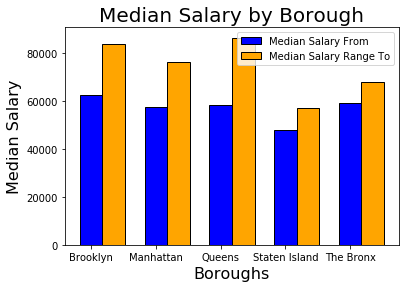

In [22]:
boroughs = new_df["Borough"]
pos = np.arange(len(boroughs))
data1=new_df["Salary Range From"]
data2 = new_df["Salary Range To"]
medians = ["Median Salary From", "Median Salary Range To" ]

bar_width = 0.35
 
plt.bar(pos,data1,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,data2,bar_width, color='orange',edgecolor='black')

plt.xticks(pos, boroughs)
plt.xlabel('Boroughs', fontsize=16)
plt.ylabel('Median Salary', fontsize=16)
plt.title('Median Salary by Borough',fontsize=20)
plt.legend(medians,loc="best")

plt.savefig("MedianSalBarchart.png")

plt.show()



In [13]:
new_df.dtypes

Borough               object
Salary Range From    float64
Salary Range To      float64
dtype: object

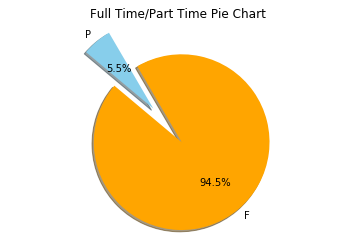

In [51]:
labels = FTPT_df["F/P"]
sizes = FTPT_df['counts']
colors = ['orange','skyblue']
explode = (0.5, 0)  # explode 1st slice

# Plot
plt.title("Full Time/Part Time Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.savefig("FullPartPieChart")

plt.axis('equal')
plt.show()

In [57]:
postingTypedf_vc = nyc_df["Posting Type"].value_counts()
postingTypedf = postingTypedf_vc.rename_axis('Internal/External').reset_index(name='counts')
postingTypedf

,Internal/External,counts
0,Internal,1676
1,External,1291


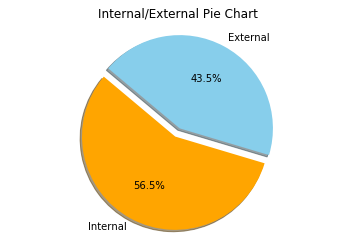

In [60]:
labels = postingTypedf["Internal/External"]
sizes = postingTypedf['counts']
colors = ['orange','skyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.title("Internal/External Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.savefig("InternalExternalPieChart")

plt.axis('equal')
plt.show()